In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [2]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
import seaborn as sns
sns.set_style("whitegrid")

In [4]:
state = 'AL'

In [5]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_symptoms_df_expanded.fea'
symptoms_dataframe_ri = pd.read_feather(file_symptoms)


In [6]:
symptoms_dataframe_ri = symptoms_dataframe_ri.iloc[::-1]

In [7]:
symptoms_dataframe_ri.columns

Index(['level_0', 'listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area',
       ...
       'open floor plan, stainless appliances',
       'separate shower, stainless appliances',
       'separate shower, walkin closet',
       'beautiful hardwood floors, full bath, main level',
       'full bath, granite countertops, main level',
       'full bath, great room, main level',
       'full bath, laundry room, main level',
       'full bath, main level, master bedroom',
       'full bath, main level, master suite',
       'full bath, main level, separate shower'],
      dtype='object', length=2402)

In [8]:
symptoms_dataframe_ri['transaction_year'] = np.floor(np.array((symptoms_dataframe_ri['Transdate'].values/10000)))

In [9]:
symptoms_dataframe_ri = symptoms_dataframe_ri.dropna()

In [10]:
symptoms_dataframe_ri[symptoms_dataframe_ri.columns[pd.Series(symptoms_dataframe_ri.columns).str.startswith('Trans')]]

,Transdate,Transprice
205758,20050825,116500.0
205757,20051103,124000.0
205756,20050503,198900.0
205755,20050715,190500.0
205754,20050607,132500.0
...,...,...
4,20200803,247000.0
3,20200717,555000.0
2,20200710,277000.0
1,20200709,191000.0


In [11]:
symptoms_df = symptoms_dataframe_ri.iloc[:,17:]

In [12]:
symptoms_df['cj_living_area'] = symptoms_dataframe_ri['cj_living_area']
symptoms_df['avmValue'] = symptoms_dataframe_ri['avmValue']
symptoms_df['transaction_year'] = symptoms_dataframe_ri['transaction_year'] 

(array([   79.,   103.,   121.,   147.,   195.,   210.,   233.,   312.,
          333.,   401.,   494.,   601.,   727.,   880.,  1214.,  1769.,
         2697.,  4413.,  8079., 16149., 32862., 47425., 37569., 20589.,
        11083.,  6531.,  4250.,  3255.,  2315.,   723.]),
 array([-1.49706191, -1.42716385, -1.35726579, -1.28736773, -1.21746966,
        -1.1475716 , -1.07767354, -1.00777548, -0.93787742, -0.86797935,
        -0.79808129, -0.72818323, -0.65828517, -0.5883871 , -0.51848904,
        -0.44859098, -0.37869292, -0.30879485, -0.23889679, -0.16899873,
        -0.09910067, -0.0292026 ,  0.04069546,  0.11059352,  0.18049158,
         0.25038965,  0.32028771,  0.39018577,  0.46008383,  0.52998189,
         0.59987996]),
 <BarContainer object of 30 artists>)

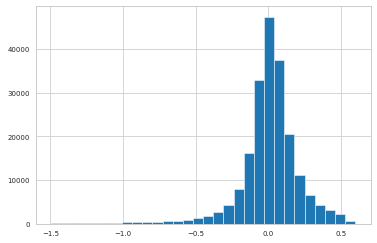

In [13]:
plt.hist(symptoms_dataframe_ri['avmerror'], bins=30 )

In [14]:
np.percentile(symptoms_dataframe_ri['avmerror'],[33.3,66.6])

array([-0.03495883,  0.06904869])

In [15]:
predictor_columns = symptoms_df.columns

In [16]:
symptoms_df = symptoms_df.loc[:,predictor_columns]

In [17]:
symptoms_dataframe_ri.columns

Index(['level_0', 'listingid', 'qtr', 'tax_year', 'cbsa_div', 'cbsa', 'state',
       'Transdate', 'Transprice', 'cj_living_area',
       ...
       'separate shower, stainless appliances',
       'separate shower, walkin closet',
       'beautiful hardwood floors, full bath, main level',
       'full bath, granite countertops, main level',
       'full bath, great room, main level',
       'full bath, laundry room, main level',
       'full bath, main level, master bedroom',
       'full bath, main level, master suite',
       'full bath, main level, separate shower', 'transaction_year'],
      dtype='object', length=2403)

In [18]:
Predictors = symptoms_df.to_numpy()

In [19]:
Predictors.shape

(205759, 2388)

In [20]:
predictand = symptoms_dataframe_ri.avmerror.values

In [21]:
predictand.shape

(205759,)

In [23]:

nclasses = 2
discretizer = KBinsDiscretizer(n_bins=nclasses, encode='ordinal', strategy='quantile')

In [24]:

Series = predictand

discretizer.fit(Series.reshape(-1,1))
Series_disctzd = discretizer.transform(Series.reshape(-1,1))

print(discretizer.bin_edges_[0])

[-1.49706191  0.01646601  0.59987996]


In [25]:
Series_disctzd = Series_disctzd.reshape(len(Series_disctzd))

In [26]:
train_samples = 150000  # Samples used for training the models
X_train, X_test, y_train, y_test = train_test_split(
    Predictors,
    Series_disctzd,
    shuffle=True,
    test_size=len(Predictors) - train_samples,
)

In [27]:
#model = RandomForestRegressor(n_estimators = 100,  min_samples_leaf=30, 
#                              max_features = 6, max_depth=40
#                              )

model = RandomForestClassifier(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50, 
                              )
                              


In [28]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features=150, min_samples_leaf=20)

In [29]:
print(model.get_params(deep=True))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 150, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 20, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [30]:
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

In [31]:
predictions_test_prob = model.predict_proba(X_test)
predictions_train_prob = model.predict_proba(X_train)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [33]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

[[51384 23800]
 [30188 44628]]


In [34]:
accuracy_score(y_train, predictions_train)

0.64008

In [36]:
f1_score(y_train, predictions_train, average='macro')

0.6393483815497694

In [37]:
f1_score(y_train, predictions_train, average='micro')

0.64008

In [38]:
precision_score(y_train, predictions_train, average= 'macro')

0.6410555972005187

In [40]:
cm_test = confusion_matrix(y_test, predictions_test)
print(cm_test)

[[18168  9527]
 [12333 15731]]


In [41]:
accuracy_score(y_test, predictions_test)

0.6079556663498269

In [ ]:
import joblib
filename = 'RF_class_firstStage.sav'
joblib.dump(model,filename)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:

# Number of trees in random forest
n_estimators = [100]
# Number of features to consider at every split
max_features = [ 100, 150, 200]
# Maximum number of levels in tree
max_depth = [40, 50, 60]
# Minimum number of samples required to split a node
min_samples_split = [10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [15, 20, 25]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [ ]:
n_estimators

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=1, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:

#base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
#base_model.fit(train_features, train_labels)
#base_accuracy = evaluate(base_model, test_features, test_labels)

best_random = rf_random.best_estimator_
best_random_model_prediction = best_random.predict(X_test)


In [ ]:
accuracy_score(y_test, best_random_model_prediction)

## Regression

In [ ]:
y_testR

In [25]:
train_samples = 150000  # Samples used for training the models
X_trainR, X_testR, y_trainR, y_testR = train_test_split(
    Predictors,
    Series,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [26]:
y_trainR

array([ 0.11006052, -0.08330718,  0.14931981, ..., -0.00040953,
       -0.02154391, -0.20270438])

In [ ]:
modelRegression = [RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50),
                       RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50),
                       RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50)]


In [ ]:
for i in range(3):
    print(i)
    y_trainR_temp = y_trainR[np.where(y_train == i)[0]]
    X_trainR_temp = X_trainR[np.where(y_train == i)[0],:]
    
    y_testR_temp = y_testR[np.where(y_test == i)[0]]
    X_testR_temp = X_testR[np.where(y_test == i)[0],:]    
    
    modelRegression[i].fit(X_trainR_temp, y_trainR_temp)
    
    
 

In [ ]:
for i in range(3):
    print(i)
    import joblib
    filename = 'RF_class_secondStage_'+str(i)+'_.sav'
    joblib.dump(modelRegression[i],filename)

In [ ]:
df = symptoms_dataframe_ri.copy()

for i in range(3):
    print(i)
    y_trainR_temp = y_trainR[np.where(y_train == i)[0]]
    X_trainR_temp = X_trainR[np.where(y_train == i)[0],:]
    
    y_testR_temp = y_testR[np.where(y_test == i)[0]]
    X_testR_temp = X_testR[np.where(y_test == i)[0],:]    
    
    predictions_testR = modelRegression[i].predict(X_testR_temp)
    predictions_trainR = modelRegression[i].predict(X_trainR_temp)

    avmValue_test = df['avmValue'].values[train_samples:][np.where(y_test == i)[0]]
    avmValue_train = df['avmValue'].values[:train_samples][np.where(y_train == i)[0]]
    
    predictions_test_valueR = avmValue_test/(1-predictions_testR)
    predictions_train_valueR = avmValue_train/(1-predictions_trainR)
    
    print('') 
    fig = plt.figure()
    plt.plot(predictions_test_valueR, 
         df['Transprice'].values[train_samples:][np.where(y_test == i)[0]],'o')
    plt.plot(predictions_test_valueR,predictions_test_valueR)
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(df['Transprice'].values[train_samples:][np.where(y_test == i)[0]]-predictions_test_valueR)/\
              (df['Transprice'].values[train_samples:][np.where(y_test == i)[0]])))
    print(np.mean(np.abs(df['Transprice'].values[train_samples:][np.where(y_test == i)[0]] - avmValue_test)/\
                  (df['Transprice'].values[train_samples:][np.where(y_test == i)[0]])))
    
    print('') 
    print('Training') 
    print(np.mean(np.abs(df['Transprice'].values[:train_samples][np.where(y_train == i)[0]]-predictions_train_valueR)/\
              (df['Transprice'].values[:train_samples][np.where(y_train == i)[0]])))
    print(np.mean(np.abs(df['Transprice'].values[:train_samples][np.where(y_train == i)[0]] - avmValue_train)/\
                  (df['Transprice'].values[:train_samples][np.where(y_train == i)[0]])))    

In [30]:
df = symptoms_dataframe_ri.copy()

In [27]:
train_samples = 150000  # Samples used for training the models
X_trainR, X_testR, y_trainR, y_testR = train_test_split(
    Predictors,
    Series,
    shuffle=False,
    test_size=len(Predictors) - train_samples,
)

In [28]:
y_trainR_temp = y_trainR
X_trainR_temp = X_trainR

y_testR_temp = y_testR
X_testR_temp = X_testR 

modelRegressionFull = RandomForestRegressor(n_estimators = 100,  min_samples_leaf=20, 
                              max_features = 150, max_depth=50)

modelRegressionFull.fit(X_trainR_temp, y_trainR_temp)

RandomForestRegressor(max_depth=50, max_features=150, min_samples_leaf=20)



Testing
0.13738878524482603
0.14029703105612287

Training
0.12684858715212094
0.13592003723328466


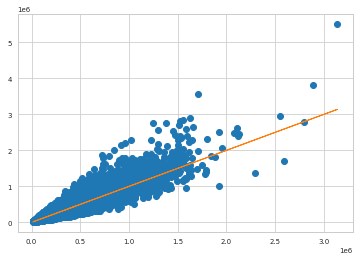

In [31]:
y_trainR_temp = y_trainR
X_trainR_temp = X_trainR

y_testR_temp = y_testR
X_testR_temp = X_testR

predictions_testR = modelRegressionFull.predict(X_testR_temp)
predictions_trainR = modelRegressionFull.predict(X_trainR_temp)

avmValue_test = df['avmValue'].values[train_samples:]
avmValue_train = df['avmValue'].values[:train_samples]

predictions_test_valueR = avmValue_test/(1-predictions_testR)
predictions_train_valueR = avmValue_train/(1-predictions_trainR)

print('') 
fig = plt.figure()
plt.plot(predictions_test_valueR, 
     df['Transprice'].values[train_samples:],'o')
plt.plot(predictions_test_valueR,predictions_test_valueR)

print('') 
print('Testing')
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_valueR)/\
          (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:] - avmValue_test)/\
              (df['Transprice'].values[train_samples:])))

print('') 
print('Training') 
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_valueR)/\
          (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples] - avmValue_train)/\
              (df['Transprice'].values[:train_samples])))    

In [ ]:
df_Thu = df.iloc[train_samples:,:17] 

In [ ]:
df_Thu['avmvalue_modified02'] = predictions_test_valueR

In [ ]:
df_Thu = df_Thu.drop(columns=['level_0'])

In [ ]:
df_Thu

In [ ]:
file_symptoms = 'comments/raw_comments/agent_comments_'+state+\
                        '_for_Thu_01.fea'
df_Thu.reset_index().to_feather(file_symptoms)

In [ ]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns


In [ ]:
list(features[indices][-250:])

In [ ]:
[features[i] for i in indices]

In [ ]:
symptoms_dataframe_ri